In [2]:
import numpy as np                     #numpy for numerical computation on arrays
import pandas as pd                    #pandas for data manipulation and analysis
import matplotlib.pyplot as plt        #matplotlib for data visualization
import matplotlib.ticker as ticker     #ticker for configuring and customizing tick locators and formatters on plots
import plotly.express as px            #Plotly for creating interactive and web-based visualizations.
import seaborn as sns                  #Seaborn is a high-level data visualization library built on top of Matplotlib
import warnings                        #warning is used to handle the warnings that occurs during the program execution
warnings.filterwarnings('ignore')
df_transfer = pd.read_csv('./final_data.csv') 

In [3]:
print(f'final dataset: {df_transfer.shape}')
df_transfer.head()

final dataset: (10754, 22)


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## Data Exploration and Pre-Processing

In [4]:
df_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [5]:
df_transfer.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [7]:
df_transfer.head().transpose()

,0,1,2,3,4
player,/david-de-gea/profil/spieler/59377,/jack-butland/profil/spieler/128899,/tom-heaton/profil/spieler/34130,/lisandro-martinez/profil/spieler/480762,/raphael-varane/profil/spieler/164770
team,Manchester United,Manchester United,Manchester United,Manchester United,Manchester United
name,David de Gea,Jack Butland,Tom Heaton,Lisandro Martínez,Raphaël Varane
position,Goalkeeper,Goalkeeper,Goalkeeper,Defender Centre-Back,Defender Centre-Back
height,189.0,196.0,188.0,175.0,191.0
age,32.0,30.0,37.0,25.0,30.0
appearance,104,15,4,82,63
goals,0.0,0.0,0.0,0.02809,0.017889
assists,0.0,0.0,0.0,0.05618,0.017889
yellow cards,0.009585,0.069018,0.0,0.224719,0.053667


In [29]:
# cleaning
df_transfer.isna().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
goals+assists          0
dtype: int64

In [30]:
df_transfer.duplicated().sum()

0

In [31]:
df_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award                10754 non-null 

## Data Visualization

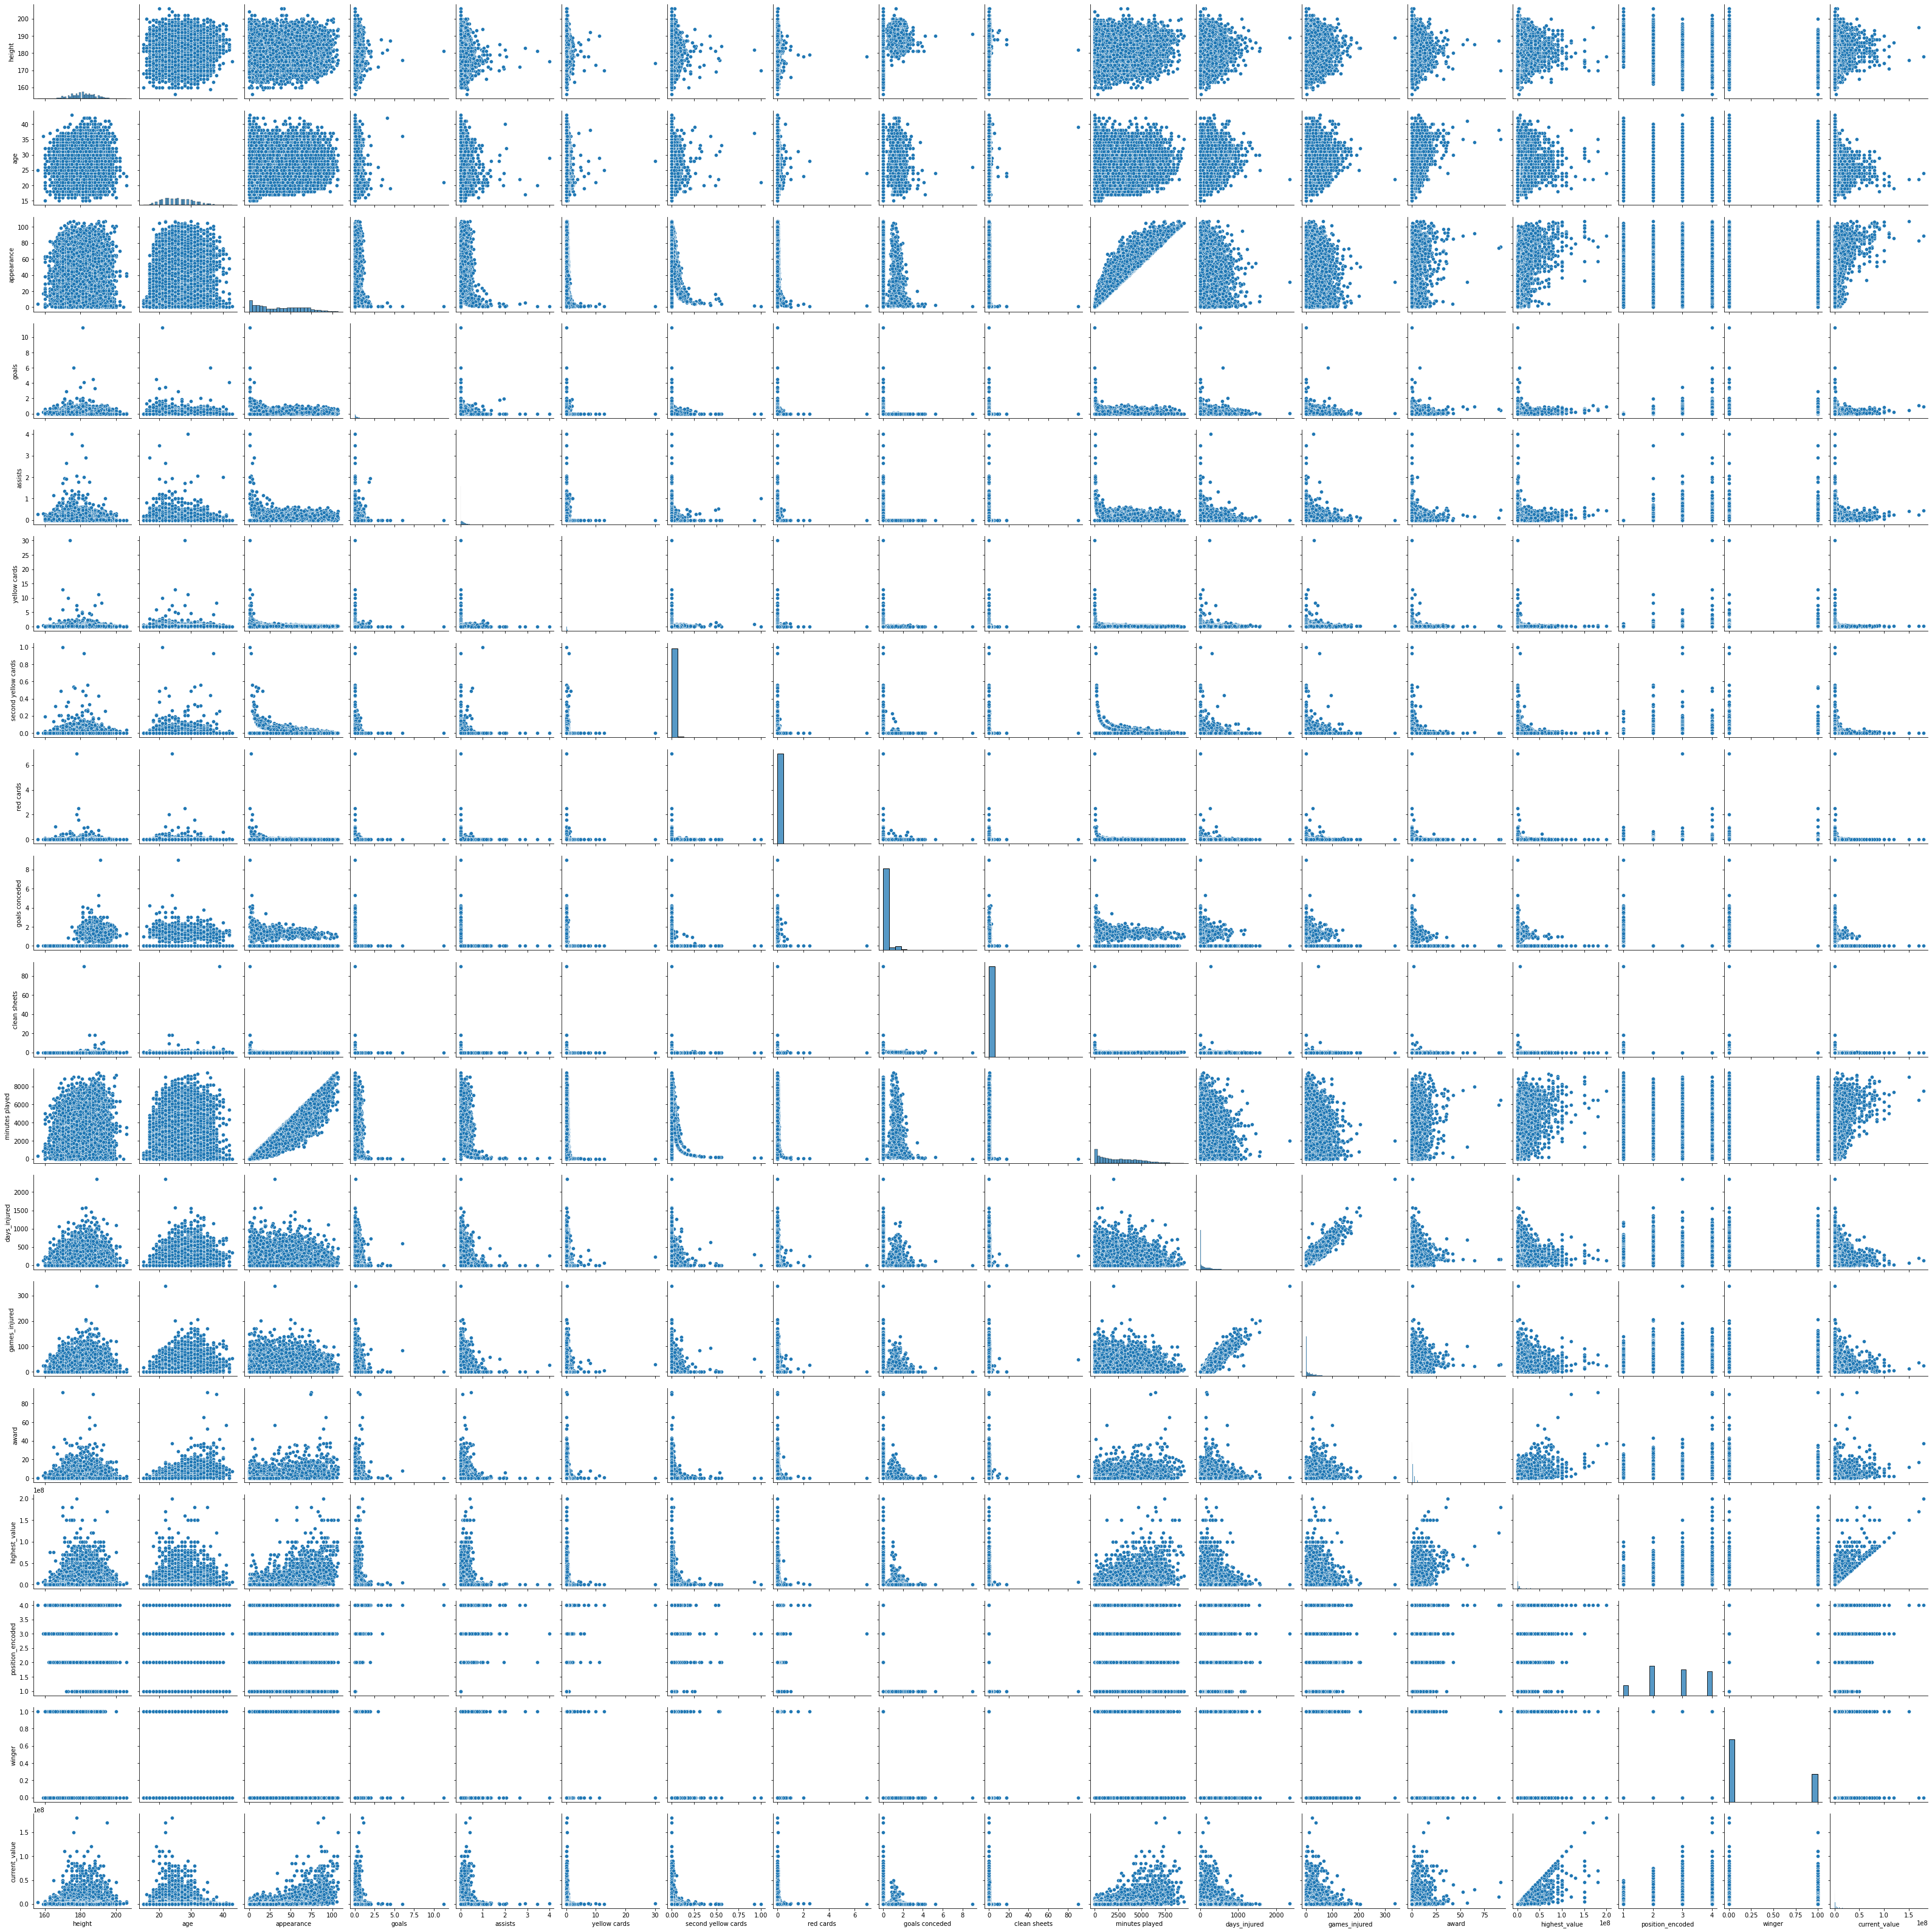

In [6]:
# Select relevant features
features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
            'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured',
            'award', 'highest_value', 'position_encoded', 'winger', 'current_value']

# Filter the dataset to include only selected features
df_filtered = df_transfer[features]

# Create a pair plot
sns.pairplot(df_filtered)
plt.show()


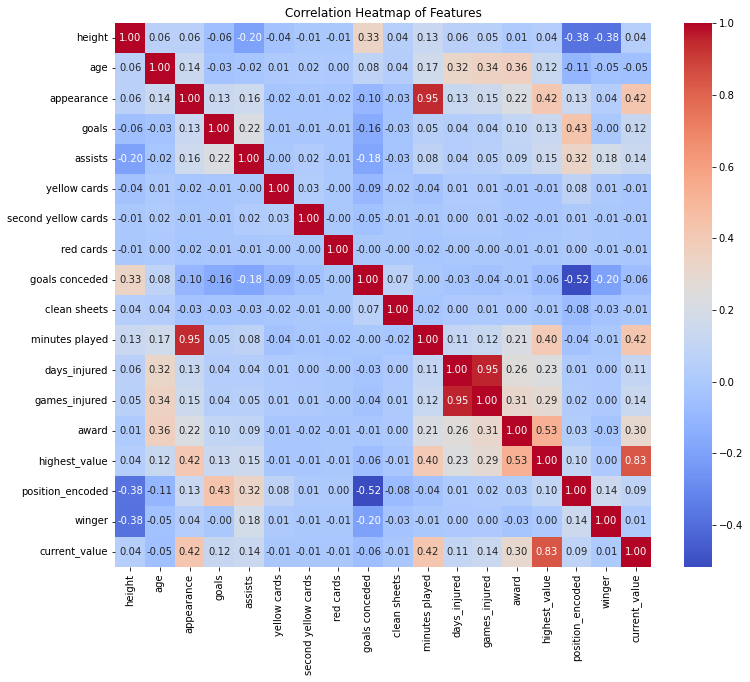

In [7]:
# Select relevant features
features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
            'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured',
            'award', 'highest_value', 'position_encoded', 'winger', 'current_value']

# Filter the dataset to include only selected features
df_filtered = df_transfer[features]

# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


`The above heatmap shows the coorelation between different features in the dataset`

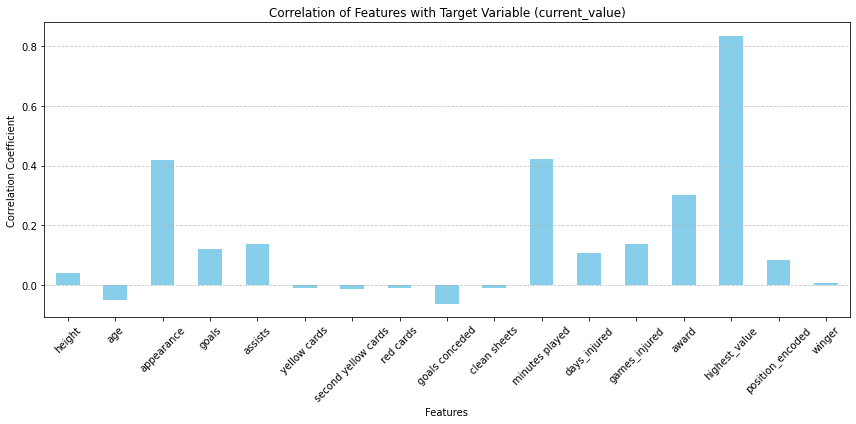

In [8]:
# Select relevant features
features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
            'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured',
            'award', 'highest_value', 'position_encoded', 'winger', 'current_value']

# Filter the dataset to include only selected features
df_filtered = df_transfer[features]

# Calculate the correlation between each feature and the target variable
correlation_with_target = df_filtered.corr()['current_value'].drop('current_value')

# Create a bar plot of the correlation coefficients
plt.figure(figsize=(12, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target Variable (current_value)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


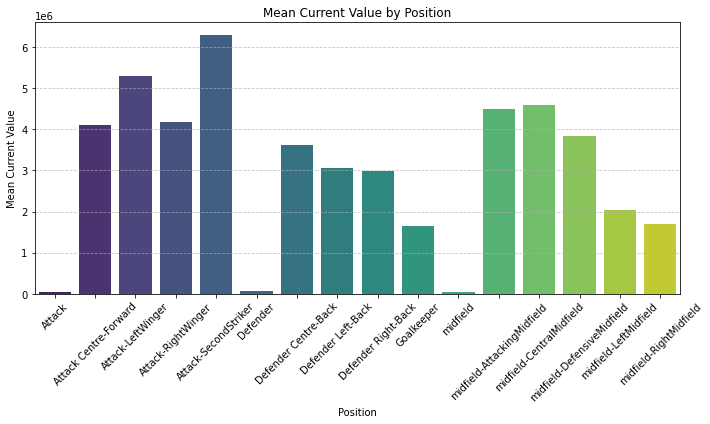

In [9]:
# Select relevant features
features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
            'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured',
            'award', 'highest_value', 'position', 'current_value']

# Filter the dataset to include only selected features
df_filtered = df_transfer[features]

# Group the data by 'position' and calculate the mean value of 'current_value' for each group
mean_current_value_by_position = df_filtered.groupby('position')['current_value'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='current_value', data=mean_current_value_by_position, palette='viridis')
plt.title('Mean Current Value by Position')
plt.xlabel('Position')
plt.ylabel('Mean Current Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`This bar plot is showing the mean value of 'current_value' for each position. It provides insights into how the average transfer value varies across different player positions. `

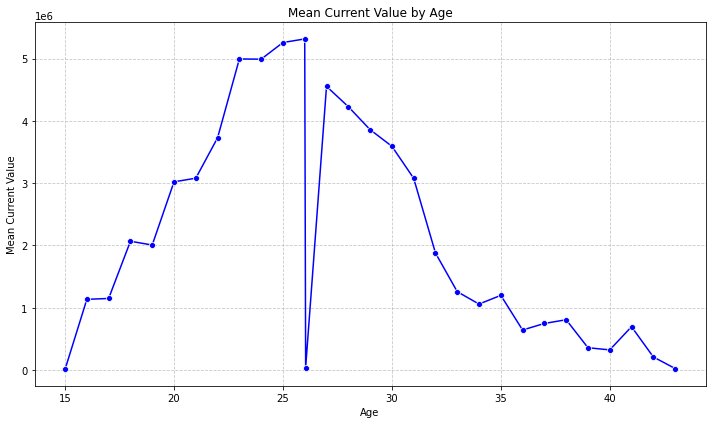

In [11]:
# Select relevant features
features = ['age', 'current_value']

# Filter the dataset to include only selected features
df_filtered = df_transfer[features]

# Group the data by 'age' and calculate the mean value of 'current_value' for each age
mean_current_value_by_age = df_filtered.groupby('age')['current_value'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='current_value', data=mean_current_value_by_age, marker='o', color='blue')
plt.title('Mean Current Value by Age')
plt.xlabel('Age')
plt.ylabel('Mean Current Value')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`This line graph is showing the trend of the mean value of 'current_value' as the age of the players changes. It helps visualize how the transfer value of players varies with age, providing insights into how age influences player valuation in the football transfer market.`

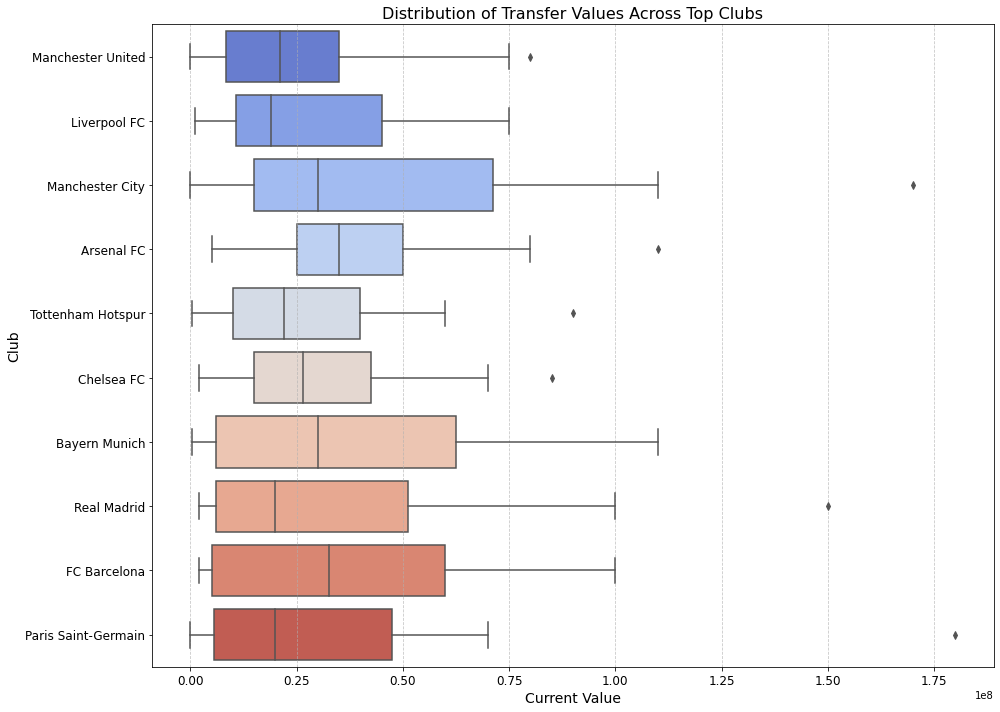

In [18]:
# Select relevant features
features = ['team', 'current_value']  # Assuming 'team' represents the club

# Filter the dataset to include only selected features
df_filtered = df_transfer[features]

# Calculate the total transfer value for each club
total_transfer_value_by_club = df_filtered.groupby('team')['current_value'].sum().reset_index()

# Select the top N clubs based on total transfer value
top_clubs = total_transfer_value_by_club.nlargest(10, 'current_value')['team']

# Filter the dataset to include only data for the top clubs
df_filtered_top_clubs = df_filtered[df_filtered['team'].isin(top_clubs)]

# Create a larger box plot to visualize the distribution of transfer values across different clubs
plt.figure(figsize=(14, 10))
sns.boxplot(x='current_value', y='team', data=df_filtered_top_clubs, palette='coolwarm')
plt.title('Distribution of Transfer Values Across Top Clubs', fontsize=16)
plt.xlabel('Current Value', fontsize=14)
plt.ylabel('Club', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`we first calculate the total transfer value for each club and then select the top 10 clubs based on their total transfer value. We filter the dataset to include only data for these top clubs and then create a box plot to visualize the distribution of transfer values across these clubs.`

# Questions about EDA

1.Identify the player with the highest combined total of goals and assists.

2.Find the team with the highest ratio of red cards to minutes played.

3.Find the relationship between age and the number of awards won by the player.

4.Calculate the average value per appearance for each player and identify the top three players.

5.Analyze the correlation between the number of yellow cards and goals conceded by a team.

6.Identify players whose current value is higher than their highest value and vice versa.

7.Create a metric that combines appearances, goals, and assists to evaluate a player's overall offensive contribution.

8.Investigate the relationship between the number of injuries in a match and the goalkeeper's clean sheets.

9.Explore the distribution of injury_days for players who have won the award and those who have not.

10.Use advanced visualization techniques to represent the relationship between player age, goals, and current value.

### Q1.Identify the player with the highest combined total of goals and assists.

In [9]:
df_transfer['goals+assists'] = df_transfer['goals'] + df_transfer['assists']
df_transfer.groupby('player')['goals+assists'].sum().sort_values(ascending=False)[:1]

player
/rakan-al-dosari/profil/spieler/998314    11.25
Name: goals+assists, dtype: float64

### Q2.Find the team with the highest ratio of red cards to minutes played.

In [10]:
df_temp = df_transfer[['team', 'red cards', 'minutes played']].copy()

df_temp['redcards/minutes'] = df_temp.apply(lambda row: (row['red cards'] / row['minutes played']) if row['minutes played'] else 0, axis=1)
df_temp.sort_values(by='redcards/minutes', ascending=False)[:1]

,team,red cards,minutes played,redcards/minutes
3527,Goiás Esporte Clube,6.923077,13,0.532544


### Q3.Find the relationship between age and the number of awards won by the player.

<AxesSubplot:xlabel='age', ylabel='award'>

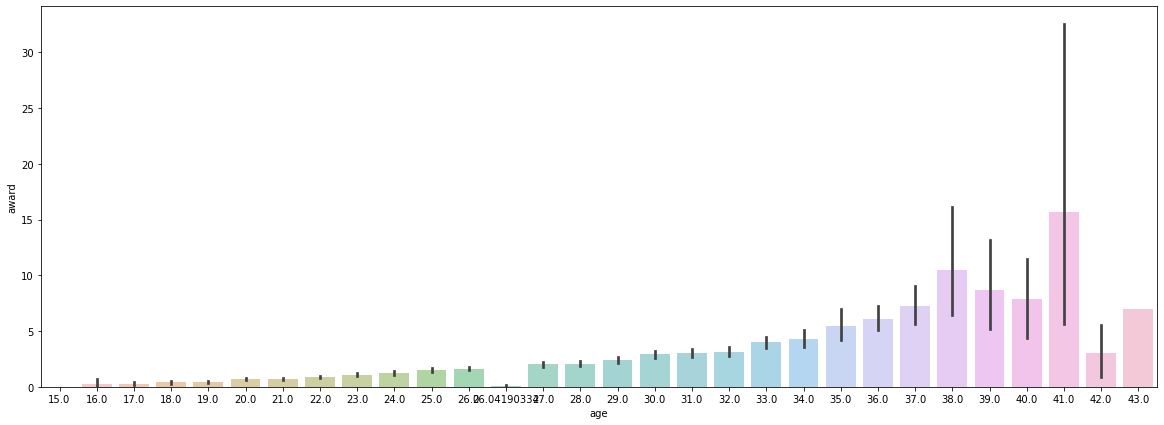

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
sns.barplot(data=df_transfer, x='age', y='award', alpha=.5)

### Q4.Calculate the average value per appearance for each player and identify the top three players.

In [13]:
df_temp = df_transfer[['name', 'appearance']].copy()
avg_value_appear = df_temp['appearance'].mean()
print(f"Average value per appearance for players: {avg_value_appear}")

df_temp.groupby('name')['appearance'].sum().sort_values(ascending=False)[:3]

Average value per appearance for players: 36.40701134461596


name
Paulinho      248
João Pedro    185
Danilo        176
Name: appearance, dtype: int64

### Q5.Analyze the correlation between the number of yellow cards and goals conceded by a team.

<AxesSubplot:xlabel='yellow cards', ylabel='goals'>

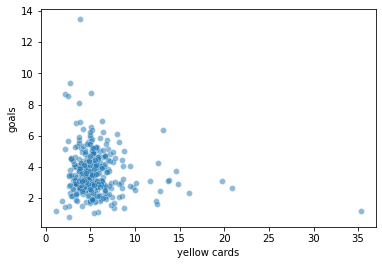

In [15]:

df_temp = df_transfer[['team', 'yellow cards', 'goals']]
team_stats = df_temp.groupby('team').agg({
    "yellow cards": 'sum',
    "goals": 'sum'
}).reset_index()
sns.scatterplot(data=team_stats, x='yellow cards', y='goals', alpha=.5)

### Q6.Identify players whose current value is higher than their highest value and vice versa.

In [17]:
df_temp = df_transfer[['name','highest_value', 'current_value']].copy()
df_temp['hv>cv'] = df_temp['highest_value'] > df_temp['current_value']
df_temp[df_temp['hv>cv']==True]

,name,highest_value,current_value,hv>cv
0,David de Gea,70000000,15000000,True
1,Jack Butland,22000000,1500000,True
2,Tom Heaton,6000000,600000,True
4,Raphaël Varane,80000000,40000000,True
5,Harry Maguire,70000000,25000000,True
...,...,...,...,...
10742,Milos Ninkovic,5500000,250000,True
10744,Alessandro Lopane,150000,125000,True
10745,Brandon Borrello,1200000,700000,True
10746,Amor Layouni,1000000,500000,True


In [19]:
df_temp = df_transfer[['name','highest_value', 'current_value']].copy()
df_temp['hv<cv'] = df_temp['highest_value'] < df_temp['current_value']
df_temp[df_temp['hv<cv']==True]

,name,highest_value,current_value,hv<cv


### Q7.Create a metric that combines appearances, goals, and assists to evaluate a player's overall offensive contribution.

In [21]:
df_temp = df_transfer[['name', 'appearance', 'goals', 'assists']].copy()
df_temp['offensive_contribution'] = df_temp['appearance'] * 1.5 \
                                    + df_temp['goals'] * 2 \
                                    + df_temp['assists'] * 1.25

# this is not a formula, those are just weighst ramdomly given
df_temp

,name,appearance,goals,assists,offensive_contribution
0,David de Gea,104,0.000000,0.000000,156.000000
1,Jack Butland,15,0.000000,0.000000,22.500000
2,Tom Heaton,4,0.000000,0.000000,6.000000
3,Lisandro Martínez,82,0.028090,0.056180,123.126404
4,Raphaël Varane,63,0.017889,0.017889,94.558140
...,...,...,...,...,...
10749,Aidan Simmons,16,0.175953,0.087977,24.461877
10750,Kusini Yengi,26,0.372671,0.186335,39.978261
10751,Nathanael Blair,20,0.375000,0.000000,30.750000
10752,Zachary Sapsford,17,0.312139,0.104046,26.254335


### Q8.Investigate the relationship between the number of injuries in a match and the goalkeeper's clean sheets.

In [22]:
df_temp = df_transfer[['position', 'games_injured', 'clean sheets']]
df_temp['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

<AxesSubplot:xlabel='games_injured', ylabel='clean sheets'>

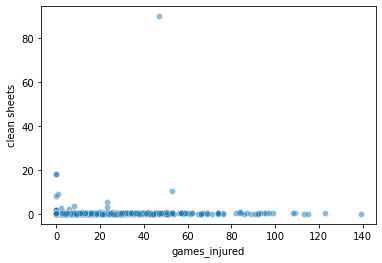

In [23]:
df_temp = df_temp[df_temp['position']=='Goalkeeper']
sns.scatterplot(data=df_temp, x='games_injured', y='clean sheets', alpha=.5)

### Q9.Explore the distribution of injury_days for players who have won the award and those who have not.

<AxesSubplot:xlabel='award_won?', ylabel='days_injured'>

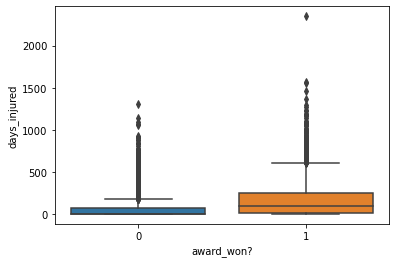

In [24]:
df_temp = df_transfer[['days_injured', 'award']].copy()
df_temp['award_won?'] = df_temp['award'].apply(lambda x: 1 if x else 0)
sns.boxplot(data=df_temp, x='award_won?', y='days_injured')

### Q10.Use advanced visualization techniques to represent the relationship between player age, goals, and current value.

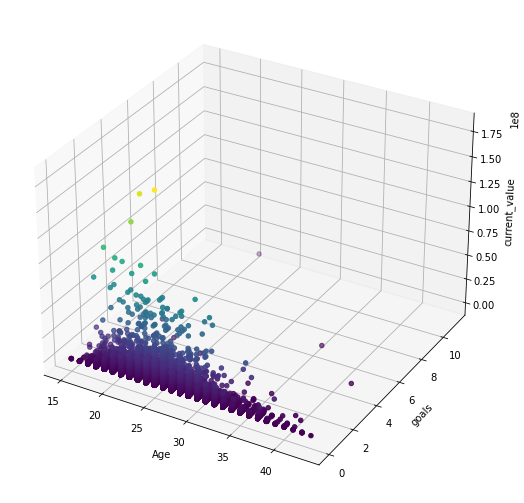

In [25]:
plot = plt.figure(figsize=(15, 9))
ax = plot.add_subplot(111, projection='3d')
scatter = ax.scatter(df_transfer['age'], df_transfer['goals'], df_transfer['current_value'], c=df_transfer['current_value'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('goals')
ax.set_zlabel('current_value')
plt.show()

### Conclusion
#### We analyze the factors that can influence a team's victory by considering the total goals and assists of a player, the ratio of red cards, the age of the player, the number of awards the player has received, the average appearance of each player, the number of injuries in the match and the keeper's clean sheets. goal.

### Splitting the dataset into training and testing

In [21]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_transfer.drop(columns=['current_value'])  # Features
y = df_transfer['current_value']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (8603, 21) (8603,)
Testing set shape: (2151, 21) (2151,)


In [22]:
X_train

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
9536,/min-seog-kim/profil/spieler/824340,Incheon United,Min-seog Kim,Attack-LeftWinger,183.0,20.0,7,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,137,0,0,0,100000,4,1
10424,/nkosingiphile-ngcobo/profil/spieler/471293,Kaizer Chiefs,Nkosingiphile Ngcobo,midfield-AttackingMidfield,165.0,23.0,33,0.123882,0.061941,0.000000,...,0.000000,0.000000,0.000000,1453,372,38,0,800000,3,0
4339,/byron-castillo/profil/spieler/400961,Club León FC,Byron Castillo,Defender Right-Back,167.0,24.0,29,0.047847,0.191388,0.287081,...,0.000000,0.000000,0.000000,1881,242,12,2,2800000,2,1
353,/ben-mee/profil/spieler/74810,Brentford FC,Ben Mee,Defender Centre-Back,180.0,33.0,62,0.098684,0.032895,0.082237,...,0.000000,0.000000,0.000000,5472,404,56,1,10000000,2,0
456,/matt-turner/profil/spieler/425306,Arsenal FC,Matt Turner,Goalkeeper,191.0,28.0,7,0.000000,0.000000,0.142857,...,0.000000,0.571429,0.571429,630,83,12,2,5000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,/britt-assombalonga/profil/spieler/186172,Watford FC,Britt Assombalonga,Attack Centre-Forward,177.0,30.0,65,0.675929,0.101389,0.168982,...,0.000000,0.000000,0.000000,2663,449,63,1,12000000,4,0
5191,/nathaniel-chalobah/profil/spieler/128900,West Bromwich Albion,Nathaniel Chalobah,midfield-DefensiveMidfield,185.0,28.0,41,0.000000,0.098468,0.196937,...,0.049234,0.000000,0.000000,1828,546,66,4,7000000,3,0
5390,/charlie-cresswell/profil/spieler/597659,Millwall FC,Charlie Cresswell,Defender Centre-Back,190.0,20.0,51,0.125000,0.025000,0.175000,...,0.000000,0.000000,0.000000,3600,62,7,0,5000000,2,0
860,/dudu/profil/spieler/369258,SV Werder Bremen,Dudu,Goalkeeper,196.0,24.0,8,0.000000,0.000000,0.000000,...,0.000000,2.003180,0.143084,629,247,23,0,300000,1,0


In [23]:
y_train

9536      100000
10424     750000
4339     2800000
353      1800000
456      5000000
          ...   
5734     2000000
5191     1800000
5390     5000000
860       200000
7270      200000
Name: current_value, Length: 8603, dtype: int64

# Machine Learning

## Modelling

### ❏ Linear Regression Model


Linear regression is a fundamental statistical technique used for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables (predictors) and the dependent variable (outcome). In its simplest form, linear regression tries to fit a straight line to the data points, allowing us to make predictions based on the input features.

Here's a brief overview of linear regression and why it's commonly used:

Model Representation:  In linear regression, the relationship between the independent variables 
x and the dependent variable y is represented by the equation of a straight line:

Fitting the Model: The goal of linear regression is to find the best-fitting line that minimizes the difference between the observed values and the values predicted by the model. This is typically done by minimizing the sum of squared differences between the actual and predicted values, known as the "least squares" method.

Interpretability: Linear regression provides interpretable coefficients that represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding other variables constant. This makes it easy to understand the impact of each predictor on the outcome.

Prediction: Once the model is trained on the data, it can be used to make predictions on new data. Linear regression is computationally efficient and can handle large datasets with ease.

Assumptions: Linear regression assumes that there is a linear relationship between the independent and dependent variables, the errors are normally distributed with constant variance (homoscedasticity), and the errors are independent of each other.

##### Linear regression was chosen for its simplicity, interpretability, and suitability for predicting continuous target variables like football player values. It provides easily interpretable coefficients, making it accessible for non-technical stakeholders. With lower computational requirements, it's efficient for large datasets and serves as a baseline for comparison with more complex models.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
# Assuming df_transfer is your DataFrame containing the dataset

# Encode categorical variables
label_encoder = LabelEncoder()
df_transfer['position_encoded'] = label_encoder.fit_transform(df_transfer['position'])

# Split the dataset into features (X) and target (y)
X = df_transfer.drop(columns=['current_value', 'position'])  # Drop 'current_value' and 'position' columns
y = df_transfer['current_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
LR = LinearRegression()

# Fit the Linear Regression model to the training data
LR.fit(X_train, y_train)

# Predictions on training data
y_train_pred = LR.predict(X_train)

# Predictions on testing data
y_test_pred = LR.predict(X_test)

# Evaluate model performance on testing data
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_pred), 2)

# Evaluate model performance on training data
print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

# Print training and testing accuracy
print("\n-----Training Accuracy-------")
print(round(LR.score(X_train, y_train), 3) * 100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test, y_test), 3) * 100)


-------Test Data--------
MAE: 2266367.461390542
MSE: 22324528606501.355
RMSE: 4724883.9780995
Explained Variance Score: 0.75315889298991 2

-------Train Data--------
MAE: 2213984.0844651116
MSE: 20106344516721.715
RMSE: 4484009.870274787

-----Training Accuracy-------
75.1
-----Testing Accuracy--------
75.3


Assessment:

Test Data Performance: The Mean Absolute Error (MAE) for the test data is approximately 2,266,367.46, indicating the average absolute difference between predicted and actual values. The Mean Squared Error (MSE) is around 22,324,528,606,501.36, reflecting the average squared difference between predicted and actual values. The Root Mean Squared Error (RMSE) is approximately 4,724,883.98, which represents the square root of MSE, providing an interpretable estimate of the average prediction error. The Explained Variance Score is about 0.75, indicating the proportion of variance in the target variable that is explained by the model.

Train Data Performance: The MAE for the training data is approximately 2,213,984.08, the MSE is around 20,106,344,516,721.72, and the RMSE is about 4,484,009.87. These metrics assess the model's performance on the training dataset.

Training and Testing Accuracy: The training accuracy is 75.1%, indicating how well the model fits the training data. The testing accuracy is 75.3%, reflecting the model's performance on unseen data.


Overall, the Linear Regression model demonstrates decent performance in predicting football player values, with relatively low prediction errors and moderate accuracy.

### ❏ Random Forest Model

Random Forest is a powerful and versatile ensemble learning technique used for both classification and regression tasks. Here's a brief overview of Random Forest and why it's commonly used:

Ensemble Learning: Random Forest belongs to the ensemble learning family of algorithms, which combines multiple individual models to create a more robust and accurate prediction model. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes (for classification) or the average prediction (for regression) of the individual trees.

Decision Trees: Random Forest is built upon the concept of decision trees. Decision trees recursively split the data into subsets based on the most significant feature at each node, aiming to minimize impurity or maximize information gain. However, decision trees are prone to overfitting and can be unstable due to high variance.

Randomization and Aggregation: Random Forest addresses the limitations of individual decision trees by introducing randomness during training. It constructs each tree using a random subset of the features and a random subset of the training data (bootstrapping). Additionally, it aggregates the predictions of multiple trees to produce the final prediction, reducing variance and improving generalization performance.

Robustness and Accuracy: Random Forest is known for its robustness and high accuracy across a wide range of datasets. By averaging the predictions of many trees, it reduces the impact of outliers and noise in the data, leading to more reliable predictions. It also tends to perform well without extensive hyperparameter tuning.

Feature Importance: Random Forest provides a measure of feature importance, indicating the relative importance of each feature in making predictions. This information can be valuable for feature selection, understanding the underlying patterns in the data, and guiding further analysis.

Scalability: Random Forest is generally scalable and can handle large datasets with high dimensionality efficiently. It can be parallelized easily, making it suitable for distributed computing environments.

Versatility: Random Forest can be applied to various types of data, including structured and unstructured data, categorical and numerical features, and problems with multiple classes or continuous outcomes. It is widely used across different domains, including finance, healthcare, marketing, and more.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Initialize the RandomForestRegressor model
RF = RandomForestRegressor()

# Fit the model to the training data
RF.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

# Evaluate model performance on testing data
print("-------Test Data--------")
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Explained Variance Score:', explained_variance_score(y_test, y_test_pred), 2)

# Evaluate model performance on training data
print("\n-------Train Data--------")
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))



-------Test Data--------
MAE: 995513.881417281
MSE: 8432772382219.741
RMSE: 2903923.618523693
Explained Variance Score: 0.9068657572393178 2

-------Train Data--------
MAE: 363463.8514803806
MSE: 1223022906348.9336
RMSE: 1105903.6605188237


Assessment:

These results indicate that the model performs better on the training data compared to the testing data, as expected. The RMSE values show that the model's predictions have a higher error on the testing data compared to the training data. However, the explained variance score of 0.9069 on the testing data indicates that the model explains a significant portion of the variance in the target variable. Overall, the model shows good performance in predicting football players' transfer fees.

In [47]:
# Print training and testing accuracy
print("\n-----Training Accuracy-------")
print(round(RF.score(X_train, y_train), 3) * 100)
print("-----Testing Accuracy--------")
print(round(RF.score(X_test, y_test), 3) * 100)



-----Training Accuracy-------
98.5
-----Testing Accuracy--------
90.7


These accuracy scores indicate that the model performs significantly better on the training data compared to the testing data. While the training accuracy is high at 98.5%, the testing accuracy is slightly lower at 90.7%, suggesting some level of overfitting.

Overall, based on these accuracy scores, the Random Forest model appears to perform well and is likely a suitable choice for the given task. Further analysis, such as examining other evaluation metrics or conducting cross-validation, could provide additional insights into the model's performance and generalization ability.

### ❏ SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. Here's a brief overview of SVM and why it's commonly used:

1. **Linear and Non-linear Classification**: SVM is capable of performing linear and non-linear classification by finding the optimal hyperplane that best separates the classes in the feature space. For non-linear problems, SVM can use kernel functions to map the input features into a higher-dimensional space where a linear separation can be achieved.

2. **Maximizing Margin**: The key idea behind SVM is to find the hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points (support vectors) from each class. By maximizing the margin, SVM aims to achieve better generalization performance and robustness to noise.

3. **Effective in High-dimensional Spaces**: SVM works well in high-dimensional spaces, making it suitable for datasets with a large number of features. It can handle datasets where the number of features exceeds the number of samples.

4. **Robust to Overfitting**: SVM is less prone to overfitting compared to some other machine learning algorithms, especially when using a proper regularization parameter (C parameter in SVM).

5. **Effective with Small to Medium-sized Datasets**: SVM performs well with small to medium-sized datasets, particularly when the number of features is relatively large compared to the number of samples. It is widely used in various domains, including text classification, image recognition, bioinformatics, and finance.

6. **Versatility**: SVM can handle various types of data, including numerical and categorical features. It can be applied to both binary and multi-class classification problems using appropriate strategies such as one-vs-one or one-vs-all.

7. **Tuning Flexibility**: SVM offers flexibility in tuning hyperparameters such as the choice of kernel function (e.g., linear, polynomial, radial basis function), regularization parameter (C), and kernel parameters (e.g., degree for polynomial kernel, gamma for RBF kernel). This allows for fine-tuning the model to achieve optimal performance.

8. **Global Optimum**: SVM aims to find the global optimum solution, which means it is less likely to get stuck in local minima compared to some other optimization algorithms.


In [48]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Support Vector Machine model
svm_model = SVR()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred_svm))
print("MSE:", mean_squared_error(y_train, y_train_pred_svm))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_svm)))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred_svm))
print("MSE:", mean_squared_error(y_test, y_test_pred_svm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_svm)))


-------Train Data--------
MAE: 3305917.6514900043
MSE: 88747389824293.36
RMSE: 9420583.30594732
-------Test Data--------
MAE: 3318119.5928835897
MSE: 98409997955795.84
RMSE: 9920181.346920824


In [49]:
# Calculate training accuracy
training_accuracy_svm = svm_model.score(X_train, y_train) * 100

# Calculate testing accuracy
testing_accuracy_svm = svm_model.score(X_test, y_test) * 100

print("-----Training Accuracy-------")
print(round(training_accuracy_svm, 1))
print("-----Testing Accuracy--------")
print(round(testing_accuracy_svm, 1))


-----Training Accuracy-------
-9.9
-----Testing Accuracy--------
-8.8


Assessment:

The model's performance, as indicated by MAE, MSE, RMSE, training accuracy, and testing accuracy, is quite poor.
Both the training and testing errors are relatively high, indicating that the model does not fit the data well and fails to accurately predict the target variable.
The low training and testing accuracies suggest that the model is not effectively capturing the underlying patterns in the data.
These results suggest that the SVM regression model may not be suitable for accurately predicting the target variable in this scenario. Possible reasons could include inappropriate choice of hyperparameters, insufficient feature engineering, or inadequacies in the modeling approach.
In summary, based on these evaluation metrics, the SVM regression model appears to perform poorly, and further analysis and potentially different modeling approaches may be necessary to improve predictive performance.

### ❏ xgboost

XGBoost (Extreme Gradient Boosting) is a powerful and widely used machine learning algorithm that belongs to the ensemble learning family, specifically the gradient boosting framework. Here's an explanation of XGBoost and its use cases:

1. **Gradient Boosting**: XGBoost is based on the gradient boosting framework, which sequentially builds an ensemble of weak learners (typically decision trees) to improve predictive performance. It combines multiple weak models to create a strong model, making it highly effective for both regression and classification tasks.

2. **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting, such as L1 and L2 regularization (also known as Lasso and Ridge regularization). Regularization helps control the complexity of the model and improves generalization performance, especially when dealing with high-dimensional data or when there are multicollinear features.

3. **Tree Pruning**: XGBoost uses tree pruning algorithms to control the complexity of individual decision trees within the ensemble. Pruning removes branches of the tree that contribute little to overall model performance, reducing overfitting and improving computational efficiency.

4. **Optimized Performance**: XGBoost is designed for speed and performance optimization. It is implemented in C++ for efficiency and provides interfaces for various programming languages, including Python and R. XGBoost utilizes parallel and distributed computing techniques to scale efficiently to large datasets and is often significantly faster than other gradient boosting implementations.

5. **Flexibility**: XGBoost supports a wide range of customization options, including different loss functions, learning rates, tree construction algorithms, and handling of missing values. This flexibility allows practitioners to tailor the algorithm to specific problem domains and optimize performance for various metrics.

6. **Feature Importance**: XGBoost provides a feature importance metric that ranks the importance of input features based on their contribution to the model's predictive performance. This feature importance analysis helps identify key variables driving predictions and provides insights into the underlying data patterns.

7. **Handling Imbalanced Data**: XGBoost includes techniques to handle imbalanced datasets, such as adjusting class weights or incorporating sampling strategies. This makes it effective for classification tasks with unequal class distributions, where maintaining balance is crucial for model performance.

When to use XGBoost:
- **High Performance Requirements**: XGBoost is suitable for tasks where performance and efficiency are critical, such as large-scale datasets or real-time applications.
- **Structured Data**: XGBoost performs well on structured/tabular data with a mix of numerical and categorical features. It is widely used in domains such as finance, healthcare, marketing, and e-commerce.
- **Predictive Accuracy**: XGBoost is effective for tasks where predictive accuracy is paramount, as it often achieves state-of-the-art performance on benchmark datasets and competitions.
- **Feature Importance Analysis**: XGBoost is valuable when interpretability and understanding feature importance are important, as it provides insights into the relative importance of input features.
- **Ensemble Learning**: XGBoost is a go-to choice when ensemble learning techniques are desired, as it combines multiple weak models to create a strong ensemble with superior predictive performance.

In summary, XGBoost is a versatile and powerful algorithm that excels in various machine learning tasks, particularly when predictive accuracy, speed, and flexibility are important considerations. It is widely used in both industry and academia and has become a standard choice for many data science projects and competitions.

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# Initialize XGBoost regressor
xgb = XGBRegressor()

# Fit the XGBoost model to the training data
xgb.fit(X_train, y_train)

# Predictions on training data
y_train_pred = xgb.predict(X_train)

# Predictions on testing data
y_test_pred = xgb.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Explained Variance Score:", explained_variance_score(y_test, y_test_pred))


-------Train Data--------
MAE: 284170.3478662122
MSE: 246996849703.24707
RMSE: 496987.7762110926
-------Test Data--------
MAE: 973815.8959484233
MSE: 7519275647939.699
RMSE: 2742129.764970961
Explained Variance Score: 0.9169459470141426


In [59]:
# Calculate R-squared score for training data
train_accuracy_xgb = r2_score(y_train, y_train_pred)
print("-----Training Accuracy-------")
print(train_accuracy_xgb)

# Calculate R-squared score for testing data
test_accuracy_xgb = r2_score(y_test, y_test_pred)
print("-----Testing Accuracy--------")
print(test_accuracy_xgb)


-----Training Accuracy-------
0.9969427142695244
-----Testing Accuracy--------
0.9168540792735542



Assessment:

The model's performance seems to be quite good, with relatively low errors and high accuracy scores. However, there's a significant discrepancy between the training and testing accuracies, suggesting potential overfitting. The model may be fitting too closely to the training data and not generalizing well to unseen data. Further investigation, such as hyperparameter tuning, cross-validation, or regularization, may be needed to address overfitting and improve the model's generalization performance. Overall, while the XGBoost model shows promising results, it's essential to ensure that it performs well on unseen data and can generalize effectively to new observations.

### ❏ Gradient Boosting Regressor

Gradient Boosting Regressor is a machine learning algorithm that belongs to the ensemble learning family, specifically the gradient boosting framework, and is used for regression tasks. Here's an explanation of Gradient Boosting Regressor and its use cases:

1. **Ensemble Learning**: Gradient Boosting Regressor combines multiple weak learners, typically decision trees, to create a strong predictive model. Unlike traditional decision trees, which are built independently, gradient boosting builds trees sequentially, with each tree attempting to correct the errors of the previous one.

2. **Gradient Boosting Framework**: The main idea behind gradient boosting is to fit a series of weak learners (typically shallow decision trees) to the residuals (the differences between the predicted and actual values) of the preceding model in the sequence. This process continues iteratively until a predefined number of trees (or a specified stopping criterion) is reached.

3. **Gradient Descent Optimization**: Gradient Boosting Regressor minimizes a loss function (such as mean squared error) using gradient descent optimization. In each iteration, the algorithm calculates the negative gradient of the loss function with respect to the model's predictions and updates the model's parameters (tree structure and leaf values) in the direction that minimizes the loss.

4. **Model Interpretability**: While individual trees in the ensemble may not be easily interpretable, the overall ensemble model can still provide insights into the relationship between input features and the target variable. Feature importance analysis can help identify the most influential features in making predictions.

5. **Regularization**: Gradient Boosting Regressor supports regularization techniques to prevent overfitting, such as shrinkage (learning rate) and tree-specific parameters like maximum depth, minimum samples per leaf, and maximum number of nodes. Regularization helps control the complexity of the model and improves generalization performance.

6. **Handling Non-linearity and Interactions**: Gradient Boosting Regressor is effective at capturing non-linear relationships and interactions between features. By fitting multiple trees to the residuals of the previous models, it can capture complex patterns in the data that may not be captured by a single tree or linear model.

7. **Robustness to Outliers and Noise**: Gradient Boosting Regressor is relatively robust to outliers and noisy data compared to some other algorithms. Since it builds trees sequentially, it can adapt to the data's structure and reduce the impact of outliers on the final predictions.

When to use Gradient Boosting Regressor:
- **High Predictive Accuracy**: Gradient Boosting Regressor often achieves state-of-the-art performance on regression tasks and is suitable when high predictive accuracy is crucial.
- **Structured Data**: It works well with structured/tabular data with a mix of numerical and categorical features, making it suitable for various domains such as finance, healthcare, and marketing.
- **Interpretability**: While not as interpretable as linear models, Gradient Boosting Regressor can still provide insights into feature importance and relationships between predictors and the target variable.
- **Handling Non-linearity**: It is effective at capturing non-linear relationships and interactions between features, making it suitable for datasets with complex patterns.
- **Robustness to Noise**: It is relatively robust to outliers and noisy data, which can be beneficial in real-world datasets with imperfect data quality.

In summary, Gradient Boosting Regressor is a powerful and versatile algorithm for regression tasks, known for its high predictive accuracy, flexibility, and robustness to noise. It is suitable for a wide range of applications and often outperforms other regression algorithms when used appropriately.

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# Initialize Gradient Boosting regressor
gb = GradientBoostingRegressor()

# Fit the Gradient Boosting model to the training data
gb.fit(X_train, y_train)

# Predictions on training data
y_train_pred = gb.predict(X_train)

# Predictions on testing data
y_test_pred = gb.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Explained Variance Score:", explained_variance_score(y_test, y_test_pred))




-------Train Data--------
MAE: 899056.2171199499
MSE: 3866644807574.7734
RMSE: 1966378.6022978316
-------Test Data--------
MAE: 1027721.6704176717
MSE: 6999643592466.446
RMSE: 2645683.9555144235
Explained Variance Score: 0.9226074349536555


In [61]:
# Calculate R-squared score for training data
train_accuracy_gb = r2_score(y_train, y_train_pred)
print("-----Training Accuracy-------")
print(train_accuracy_gb)

# Calculate R-squared score for testing data
test_accuracy_gb = r2_score(y_test, y_test_pred)
print("-----Testing Accuracy--------")
print(test_accuracy_gb)

-----Training Accuracy-------
0.9521393167191462
-----Testing Accuracy--------
0.9226000164773775


Assessment:

The model's performance seems to be quite good, with relatively low errors and high accuracy scores. The training and testing errors are both relatively low, indicating that the model fits the data well and generalizes effectively to unseen data. The training and testing accuracies are also close, suggesting that the model does not suffer from significant overfitting. Overall, the Gradient Boosting Regressor appears to perform well on both the training and testing datasets, with high accuracy and low error metrics. It seems to be a suitable model for the regression task at hand.

### ❏ K-Nearest Neighbors (KNN) regressor

KNN is chosen as it is a simple yet effective algorithm for regression tasks, especially when there is no underlying assumption about the distribution of the data.

It can capture complex patterns in the data and does not require training time for model fitting, making it computationally efficient.

KNN is suitable for this dataset because it can handle non-linear relationships between features and the target variable, which may exist in the football transfer dataset due to the diverse factors influencing players' current values.

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Predictions on training data
y_train_pred = knn.predict(X_train)

# Predictions on testing data
y_test_pred = knn.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Explained Variance Score:", explained_variance_score(y_test, y_test_pred))


-------Train Data--------
MAE: 1391450.7729861676
MSE: 16730159811809.834
RMSE: 4090251.8029835075
-------Test Data--------
MAE: 1737520.2231520223
MSE: 23718796805206.88
RMSE: 4870194.739967477
Explained Variance Score: 0.7377257941010278


In [63]:
from sklearn.metrics import r2_score

# Calculate R-squared (coefficient of determination) for training data
train_accuracy = r2_score(y_train, y_train_pred)
print("Training Accuracy (R-squared):", train_accuracy)

# Calculate R-squared (coefficient of determination) for testing data
test_accuracy = r2_score(y_test, y_test_pred)
print("Testing Accuracy (R-squared):", test_accuracy)


Training Accuracy (R-squared): 0.7929168775930773
Testing Accuracy (R-squared): 0.7377245773091492


The training accuracy indicates that approximately 79.29% of the variance in the target variable (football players' current value) can be explained by the independent variables (features) used in the KNN model.
The testing accuracy suggests that the model performs relatively well on unseen data, with approximately 73.77% of the variance in the target variable explained by the model.

# Ensemble Stacking


Ensemble stacking, also known as stacked generalization, is a technique used in machine learning to combine multiple base models (learners) to improve predictive performance. Unlike traditional ensemble methods like bagging and boosting, which combine predictions from multiple models in a simple or weighted manner, ensemble stacking leverages the predictions of multiple base models as additional features to train a meta-model, which makes the final predictions.

### Summarizing the testing accuracies:

Linear Regression: 75.3%   
Random Forest: 90.7%    
Support Vector Machine (SVM): -8.8%    
XGBoost: 91.6%   
Gradient Boosting Regressor: 92.2%

K-Nearest Neighbors(KNN) regressor:73.7%

### ❏ Hybrid Model 1

The stacked model with meta learner = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [65]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Initialize base learners
base_learners = [
    ('linear_regression', LinearRegression()),
    ('random_forest', RandomForestRegressor()),
    ('svm', SVR())
]

# Initialize stacked ensemble model with XGBoost as meta learner
stacked_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=XGBRegressor()
)

# Fit the stacked model to the training data
stacked_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred_stacked = stacked_model.predict(X_train)

# Predictions on testing data
y_test_pred_stacked = stacked_model.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("R-squared:", stacked_model.score(X_train, y_train))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("R-squared:", stacked_model.score(X_test, y_test))


-------Train Data--------
R-squared: 0.9459362764469487
-------Test Data--------
R-squared: 0.9040712387663403


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, and RMSE for training data
mae_train = mean_absolute_error(y_train, y_train_pred_stacked)
mse_train = mean_squared_error(y_train, y_train_pred_stacked)
rmse_train = np.sqrt(mse_train)

# Calculate MAE, MSE, and RMSE for testing data
mae_test = mean_absolute_error(y_test, y_test_pred_stacked)
mse_test = mean_squared_error(y_test, y_test_pred_stacked)
rmse_test = np.sqrt(mse_test)

# Print MAE, MSE, and RMSE for training data
print("-------Train Data--------")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)

# Print MAE, MSE, and RMSE for testing data
print("-------Test Data--------")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

# Print training accuracy
print("\n-----Training Accuracy-------")
print("R-squared:", stacked_model.score(X_train, y_train) * 100)

# Print testing accuracy
print("-----Testing Accuracy--------")
print("R-squared:", stacked_model.score(X_test, y_test) * 100)


-------Train Data--------
MAE: 680928.7694408075
MSE: 4367785865652.0796
RMSE: 2089924.8468909306
-------Test Data--------
MAE: 1048994.2857850455
MSE: 8675287879178.598
RMSE: 2945384.1649568565

-----Training Accuracy-------
R-squared: 94.59362764469486
-----Testing Accuracy--------
R-squared: 90.40712387663403


### ❏ Hybrid Model 2

Stacked model with meta learner = Random Forest and the weak learners = Linear Regression, XGBoost, and K-Nearest Neighbors

In [69]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Define the base learners
base_learners = [
    ('ridge', Ridge()),
    ('gbr', GradientBoostingRegressor()),
    ('knn', KNeighborsRegressor())
]

# Initialize the meta learner
meta_learner = XGBRegressor()

# Initialize the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner
)

# Fit the stacking regressor to the training data
stacking_regressor.fit(X_train, y_train)

# Predictions on training data
y_train_pred = stacking_regressor.predict(X_train)

# Predictions on testing data
y_test_pred = stacking_regressor.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Training Accuracy (R-squared):", stacking_regressor.score(X_train, y_train))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Testing Accuracy (R-squared):", stacking_regressor.score(X_test, y_test))


-------Train Data--------
MAE: 887691.9371595178
MSE: 5916414937851.497
RMSE: 2432368.174814721
Training Accuracy (R-squared): 0.9267676045795817
-------Test Data--------
MAE: 1115816.0150512524
MSE: 10064437479908.562
RMSE: 3172449.7600290794
Testing Accuracy (R-squared): 0.8887104343501443


### ❏ Hybrid Model 3

Stacked model with meta learner = XGBoost and the weak learners = Random Forest, Gradient Boosting, and Support Vector Machine

In [70]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Define the base learners
base_learners = [
    ('rf', RandomForestRegressor()),
    ('svr', SVR())
]

# Initialize the meta learner
meta_learner = XGBRegressor()

# Initialize the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner
)

# Fit the stacking regressor to the training data
stacking_regressor.fit(X_train, y_train)

# Predictions on training data
y_train_pred = stacking_regressor.predict(X_train)

# Predictions on testing data
y_test_pred = stacking_regressor.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Training Accuracy (R-squared):", stacking_regressor.score(X_train, y_train))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Testing Accuracy (R-squared):", stacking_regressor.score(X_test, y_test))


-------Train Data--------
MAE: 786525.2274984245
MSE: 4881429741894.139
RMSE: 2209395.786610932
Training Accuracy (R-squared): 0.9395784783808288
-------Test Data--------
MAE: 1189683.8169401586
MSE: 11519027652177.203
RMSE: 3393969.3063104157
Testing Accuracy (R-squared): 0.872626007496335


### ❏ Hybrid Model 4

Stacked model with meta learner = Gradient Boosting and the weak learners = Linear Regression, Ridge Regression, and Lasso Regression

In [71]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Initialize the base learners
base_learners = [
    ('rf', RandomForestRegressor()),
    ('ridge', Ridge()),
    ('svr', SVR())
]

# Initialize the voting regressor
voting_regressor = VotingRegressor(estimators=base_learners)

# Fit the voting regressor to the training data
voting_regressor.fit(X_train, y_train)

# Predictions on training data
y_train_pred = voting_regressor.predict(X_train)

# Predictions on testing data
y_test_pred = voting_regressor.predict(X_test)

# Evaluate model performance on training data
print("-------Train Data--------")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Training Accuracy (R-squared):", voting_regressor.score(X_train, y_train))

# Evaluate model performance on testing data
print("-------Test Data--------")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Testing Accuracy (R-squared):", voting_regressor.score(X_test, y_test))


-------Train Data--------
MAE: 1581664.9170459006
MSE: 18279415911395.156
RMSE: 4275443.358459466
Training Accuracy (R-squared): 0.7737404444855089
-------Test Data--------
MAE: 1774636.2209521972
MSE: 25689774309835.707
RMSE: 5068508.095074497
Testing Accuracy (R-squared): 0.7159300924376737


### Summarizing the testing accuracies:

Linear Regression: 75.3%   
Random Forest: 90.7%    
Support Vector Machine (SVM): -8.8%    
XGBoost: 91.6%   
Gradient Boosting Regressor: 92.2%

K-Nearest Neighbors(KNN) regressor:73.7%

I have performed the Ensemble Stacking to make hybrid model to increase accuracy of the Testing Dataset. For which I have tried many combinations of Models but the best approach for this is to take top three accurate model suitable to the dataframe which is:
Gradient Boosting > Xg Boost >Random Forest 

From this Hybrid Model 4, I have got the accuracy score of 90.4% for Testing Data and a whopping 94.5% for the training dataset. 

For the other Hybrid Models:  
HM 1 : 90.4%  
HM 2 : 88.8%  
HM 3 : 87.2%  
HM 4 : 71.5%